### Clase 2: Introducción a Matplotlib

In [1]:
import os
os.getcwd()  # muestra el directorio actual

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
import os
os.chdir('/content/drive/MyDrive/Docencia/Visualización de datos UCU/Python/Bases y Notebooks')

In [5]:
df_total = pd.read_csv("Total_ventas.csv")

In [8]:
df_total.head()

,Tipo Bicicleta,Unidades Vendidas,Precio Venta,Año,Fecha,Sucursal,Monto Venta
0,Electrica,947,125,2017,1/09/2017,Sucursal_n1,118375
1,Electrica,344,350,2017,5/10/2017,Sucursal_n1,120400
2,Montaña,1715,20,2017,6/10/2017,Sucursal_n1,34300
3,Paseo,1715,20,2017,21/10/2017,Sucursal_n1,34300
4,Paseo,380,15,2017,18/12/2017,Sucursal_n1,5700


In [11]:
df_total.head()           # Ver primeras filas
#df_total.columns          # Ver nombres de variables
#df_total.info()           # Estructura del DataFrame
#df_total.describe()     # Estadísticas generales

,Tipo Bicicleta,Unidades Vendidas,Precio Venta,Año,Fecha,Sucursal,Monto Venta
0,Electrica,947,125,2017,1/09/2017,Sucursal_n1,118375
1,Electrica,344,350,2017,5/10/2017,Sucursal_n1,120400
2,Montaña,1715,20,2017,6/10/2017,Sucursal_n1,34300
3,Paseo,1715,20,2017,21/10/2017,Sucursal_n1,34300
4,Paseo,380,15,2017,18/12/2017,Sucursal_n1,5700


### Grafiquemos las cantidades vendidas por año y tipo de bicicleta

In [12]:
# Agrupar las ventas por Año y Tipo de Bicicleta usando df_total
ventas_agrupadas_matplotlib = df_total.groupby(['Año', 'Tipo Bicicleta'])['Unidades Vendidas'].sum().reset_index()

# Mostrar los datos agrupados
display(ventas_agrupadas_matplotlib)

,Año,Tipo Bicicleta,Unidades Vendidas
0,2017,Electrica,112308
1,2017,Montaña,101631
2,2017,Paseo,272984
3,2018,Electrica,9959
4,2018,Montaña,13912
5,2018,Paseo,36763


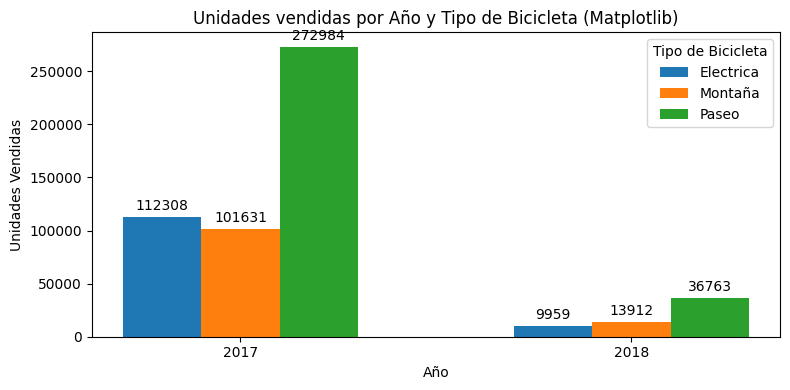

In [15]:
import matplotlib.pyplot as plt

# Preparar los datos para graficar con matplotlib
años = ventas_agrupadas_matplotlib['Año'].unique()
tipos_bicicleta = ventas_agrupadas_matplotlib['Tipo Bicicleta'].unique()

x = np.arange(len(años)) # las posiciones de las barras en el eje x

width = 0.2 # ancho de las barras

fig, ax = plt.subplots(figsize=(8, 4))

# Crear las barras para cada tipo de bicicleta y año
for i, tipo in enumerate(tipos_bicicleta):
    # Filtrar los datos por tipo de bicicleta
    ventas_por_tipo = ventas_agrupadas_matplotlib[ventas_agrupadas_matplotlib['Tipo Bicicleta'] == tipo]

    # Asegurarse de que todos los años estén representados, incluso si las ventas son 0
    ventas_completas = ventas_por_tipo.set_index('Año').reindex(años, fill_value=0).reset_index()

    # Calcular la posición de las barras para cada tipo de bicicleta
    rects = ax.bar(x + i*width, ventas_completas['Unidades Vendidas'], width, label=tipo)

    # Agregar las etiquetas de valor en las barras
    ax.bar_label(rects, padding=3)


# Añadir texto para el título, etiquetas del eje y ticks del eje x
ax.set_title('Unidades vendidas por Año y Tipo de Bicicleta (Matplotlib)')
ax.set_ylabel('Unidades Vendidas')
ax.set_xlabel('Año')
ax.set_xticks(x + width * (len(tipos_bicicleta) - 1) / 2) # Centrar los ticks del eje x
ax.set_xticklabels(años)
ax.legend(title='Tipo de Bicicleta')

fig.tight_layout()

plt.show()